In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Preprocessing

In [2]:
df = pd.read_csv("Healthcare_noshows.csv")
df_unedit = pd.read_csv("Healthcare_noshows.csv")

In [3]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')

In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship          bool
Hipertension         bool
Diabetes             bool
Alcoholism           bool
Handcap              bool
SMS_received         bool
Showed_up            bool
Date.diff           int64
dtype: object

In [5]:
df.shape

(106987, 15)

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Date.diff
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,10.166721
std,2.558267e+14,7.133274e+04,22.466214,15.263508
min,3.921784e+04,5.030230e+06,1.000000,-6.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,4.000000
75%,9.433600e+13,5.725634e+06,56.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,179.000000


In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=False)

# Visuals

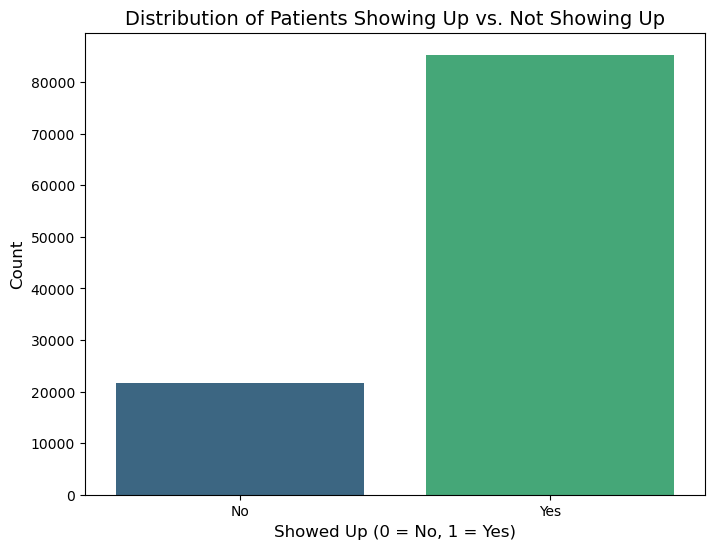

In [10]:
plt.figure(figsize=(8, 6))

# Corrected countplot to avoid the FutureWarning
sns.countplot(data=df, x='Showed_up', hue='Showed_up', palette='viridis', legend=False)
plt.title('Distribution of Patients Showing Up vs. Not Showing Up', fontsize=14)
plt.xlabel('Showed Up (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

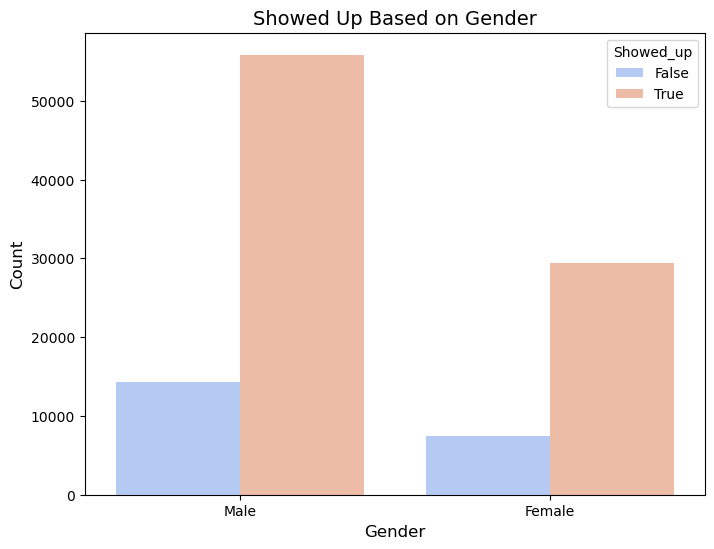

In [11]:
plt.figure(figsize=(8, 6))

# Plot Showed Up by Gender
sns.countplot(data=df_unedit, x='Gender', hue='Showed_up', palette='coolwarm')
plt.title('Showed Up Based on Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

# Method 1

# Random Forest Classifier

Random Forest Accuracy: 0.7933


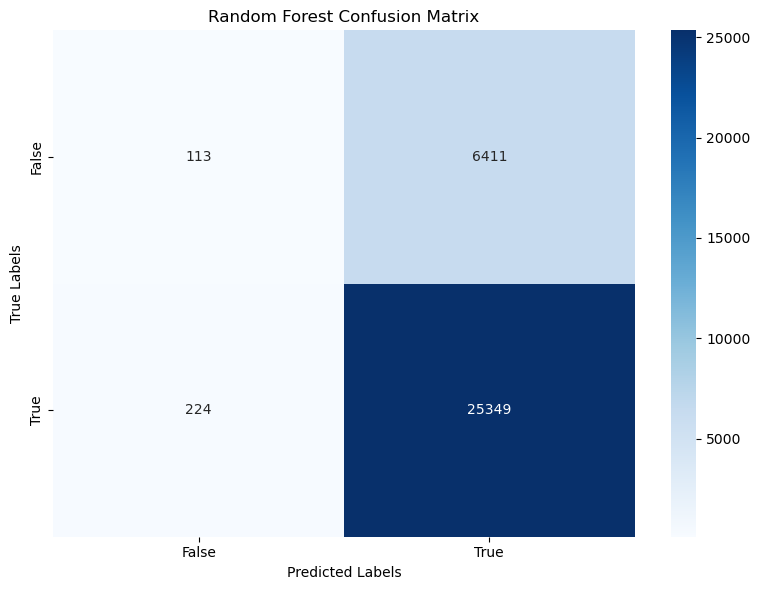

In [12]:
# Treat 'Showed_up' as a binary target
le = LabelEncoder()
df['Showed_up'] = le.fit_transform(df['Showed_up'])

# Features and target
X = df[['Age', 'SMS_received', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Gender_M', 'Gender_F']]
y = df['Showed_up']

# Train and test the data
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
randforcast = RandomForestClassifier(random_state=42)
randforcast.fit(X_trn, y_trn)

# Make predictions
y_pred = randforcast.predict(X_tst)

# Accuracy score
accuracy = accuracy_score(y_tst, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_tst, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

# Method 2

# Nueral Network

In [13]:
le = LabelEncoder()
df['Showed_up'] = le.fit_transform(df['Showed_up']) 
X = df[['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Gender_M', 'Gender_F']]
y = df['Showed_up']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build neural network
model = Sequential([Dense(16, activation='relu', input_shape=(X_train.shape[1],)),Dense(8, activation='relu'),Dense(1, activation='sigmoid')])

# Compile and run
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network Accuracy: {accuracy:.4f}")

Epoch 1/20


C:\Users\My-PC\anaconda3\envs\itcs-3156\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2675/2675 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7792 - loss: 0.5226
Epoch 2/20
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7940 - loss: 0.4974
Epoch 3/20
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7945 - loss: 0.4969
Epoch 4/20
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7972 - loss: 0.4937
Epoch 5/20
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7961 - loss: 0.4952
Epoch 6/20
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7958 - loss: 0.4950
Epoch 7/20
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8000 - loss: 0.4888
Epoch 8/20
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7972 - loss: 0.4922
Epoch 9/20
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7977 - loss: 0.4924
Epoch 10/20
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7954 - loss: 0.4950
Epoch 11/20
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7982 - loss: 0.4909
Epoch 12/20
2675/2675 ━━━━━━━━━━━━━━━━━━━

669/669 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step


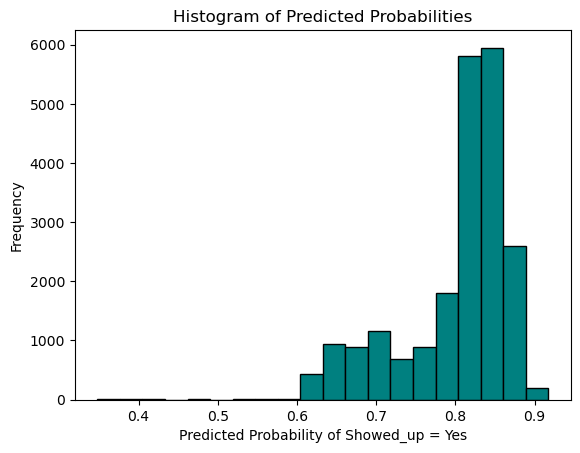

In [14]:
y_proba = model.predict(X_test).ravel()
plt.hist(y_proba, bins=20, color='teal', edgecolor='black')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability of Showed_up = Yes')
plt.ylabel('Frequency')
plt.show()